# TP4 : K-nearest neighbours & cython

## B. Classification using the K-nearest neighbours algorithm

This practical is a first introduction to classification using the most intuitive non parametric method : K nearest neighbours. The principle is the following. A set of labelled observations which can belong to 2 classes is given as a learning set. Then new observations must be classified as either of class 1 or 2. The principle of K-NN is to label a new observation from the most frequent label among its K nearest neighbours.

### 1. Using synthetic data
Load the training and test data sets synth_train.txt and synth_test.txt. Targets belong to {1,2} and entries belong to $\mathbb{R}^2$. We have 100 training data samples and 200 test samples.
    * the 1st column contains the label of the class the sample,
    * columns 2 & 3 contain the coordinates of each sample in 2D.


In [114]:
import matplotlib.pyplot as plt
import numpy as np

In [115]:
# load the training set
train = np.loadtxt('synth_train.txt')  #...,delimiter=',') if there are ',' as delimiters
class_train = train[:,0]
x_train = train[:,1:]
N_train = train.shape[0]

In [116]:
# load the test set
test = np.loadtxt('synth_test.txt') 
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]
x_test = test[:,1:]
N_test = test.shape[0]

### TO DO:
    a. Display the training set and distinguish the two classes. The function scatter can be useful.
    b. Implement the K-nearest neighbours algorithm for classification.
    c. Compute the error rate on the training set and the test set for K = 1,...,30.
    d. Comment on your results. Which value of K seems optimal ?

_Indication 1:_ Python functions to sort, norm and replicate (see `tile()`) matrices may be useful to compute and sort distances to a given data point while limiting the number of loops 'for'.

_Indication 2:_ if class_pred contains the predicted labels for N_test samples, one can display classification results by using:

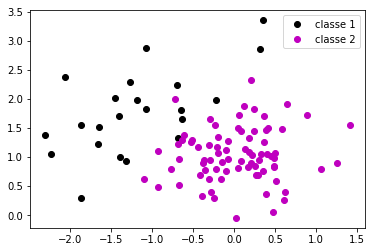

In [117]:
plt.figure()
plt.plot(train[class_train==1,1],train[class_train==1,2],'ko', label = "classe 1")  # class 1 in black
plt.plot(train[class_train==2,1],train[class_train==2,2],'mo', label = "classe 2")  # class 2 in magenta
plt.legend()
plt.show()


# plt.plot(test[class_pred==1,1],test[class_pred==1,2],'rs')  # red = predicted class = 1
# plt.plot(test[class_pred==2,1],test[class_pred==1,2],'gs')  # green = predicted class = 2

where `class_pred` contains the class predicted by your K-NN algorithm (TO DO !).

In [118]:
# b. Implement the K-nearest neighbours algorithm for classification.
def knn_algo (K) :
    

# Calcul de la matrice distances_square (N_test, N_train) : distances[i,j] donne la distance entre le point i du training set et
# le point j du test set
    tile_x_test = np.tile(x_test[:,0],(N_train,1))
    tile_y_test = np.tile(x_test[:,1],(N_train,1))

    tile_x_train = np.transpose(np.tile(x_train[:,0],(N_test,1)))
    tile_y_train = np.transpose(np.tile(x_train[:,1],(N_test,1)))

    diff_x_square = np.square(tile_x_test - tile_x_train)
    diff_y_square = np.square(tile_y_test - tile_y_train)

    distances_square = diff_x_square + diff_y_square
    #print("distance square", distances_square.shape)
    
    
    ind_sort = np.argsort(distances_square,axis=0) #tableau d'indices du training set ordonnés (ordre croissant des distances)

    knearest = ind_sort[:K,:] # la iè colonne de knearest donne les indices des k plus proches voisins du iè point du test set

# knearest_class : array avec les classes correspondant aux indices de knearest
    knearest_class = np.zeros(knearest.shape)

# count_class_1 : vecteur qui contient pour le test point i, le nombre de classes 1 parmi les knearest
    count_class_1 = np.zeros(N_test)

# predic_class : vecteur qui contient la classe prédite pour le point i du test set
    predic_class = np.zeros(N_test)
    for i in range(N_test):
        knearest_class[:,i] = class_train[knearest[:,i]]
        count_class_1 [i]= np.sum (knearest_class[:,i]==1)
        if (count_class_1[i] >= np.ceil(K/2) ):
            predic_class[i] = 1
        else:
            predic_class[i] = 2 
            # si K est pair et qu'il y a autant de classes 1 que classes 2, on prédira 1
    

    accuracy = np.sum(test[:,0] == predic_class)/N_test 
    error_rate = (1 - accuracy)*100
    
    return error_rate, predic_class


Error rate for K =  1 is 6.499999999999995 %
Error rate for K =  2 is 6.000000000000005 %
Error rate for K =  3 is 4.5000000000000036 %
Error rate for K =  4 is 5.000000000000004 %
Error rate for K =  5 is 6.000000000000005 %
Error rate for K =  6 is 5.500000000000005 %
Error rate for K =  7 is 6.999999999999995 %
Error rate for K =  8 is 6.999999999999995 %
Error rate for K =  9 is 7.499999999999996 %
Error rate for K =  10 is 7.499999999999996 %
Error rate for K =  11 is 8.999999999999996 %
Error rate for K =  12 is 7.499999999999996 %
Error rate for K =  13 is 7.9999999999999964 %
Error rate for K =  14 is 7.499999999999996 %
Error rate for K =  15 is 7.499999999999996 %
Error rate for K =  16 is 7.499999999999996 %
Error rate for K =  17 is 7.9999999999999964 %
Error rate for K =  18 is 7.9999999999999964 %
Error rate for K =  19 is 7.9999999999999964 %
Error rate for K =  20 is 7.9999999999999964 %
Error rate for K =  21 is 9.999999999999998 %
Error rate for K =  22 is 9.999999999

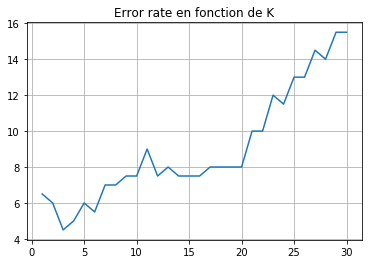

In [119]:
# c. Compute the error rate on the training set and the test set for K = 1,...,30.
nb_test = 30
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = knn_algo(K)
    print("Error rate for K = ",K, "is", error_rate[K-1], "%" )

plt.plot(np.arange(1,31),error_rate)
plt.title("Error rate en fonction de K")
plt.grid()

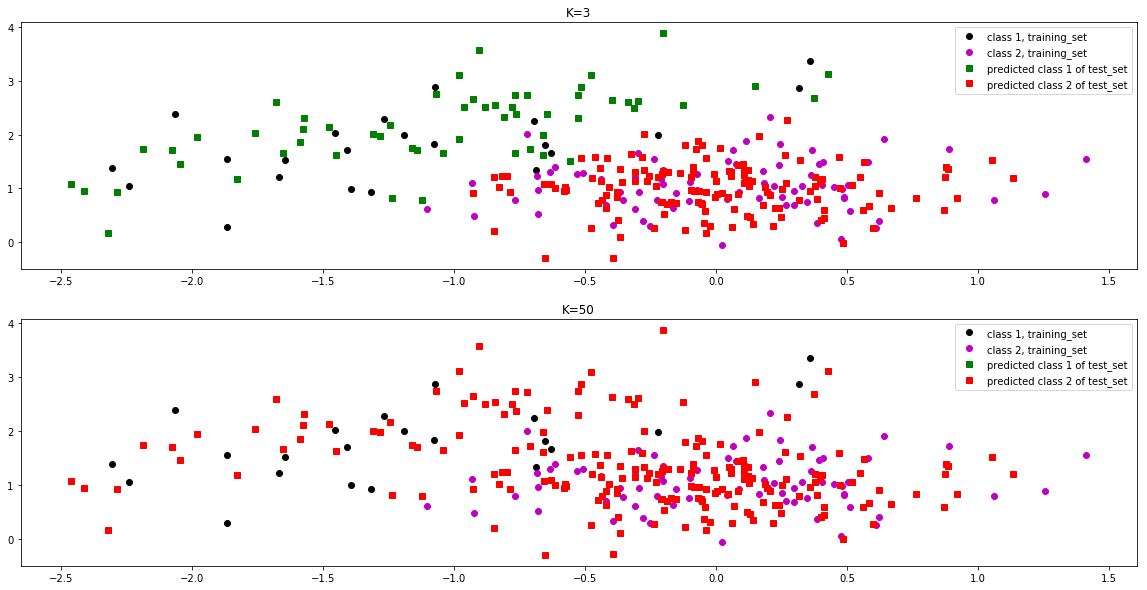

<Figure size 432x288 with 0 Axes>

In [122]:
plt.subplots(figsize=(20,10))
plt.subplot(2,1,1)
K=3

_,predic_class = knn_algo (K)
plt.plot(train[class_train==1,1],train[class_train==1,2],'ko', label = "class 1, training_set")  # class 1 in black
plt.plot(train[class_train==2,1],train[class_train==2,2],'mo', label = "class 2, training_set")  # class 2 in magenta
plt.plot(test[predic_class==1,1],test[predic_class==1,2],'gs', label = "predicted class 1 of test_set")  # en carré vert : classe 1 prédite du test set
plt.plot(test[predic_class==2,1],test[predic_class==2,2],'rs', label = "predicted class 2 of test_set")  # en carré rouge : classe 2 prédite du test set 
plt.legend()
plt.title ("K=3")



K=50
plt.subplot(2,1,2)
_,predic_class = knn_algo (K)
plt.plot(train[class_train==1,1],train[class_train==1,2],'ko', label = "class 1, training_set")  # class 1 in black
plt.plot(train[class_train==2,1],train[class_train==2,2],'mo', label = "class 2, training_set")  # class 2 in magenta
plt.plot(test[predic_class==1,1],test[predic_class==1,2],'gs', label = "predicted class 1 of test_set")  # en carré vert : classe 1 prédite du test set
plt.plot(test[predic_class==2,1],test[predic_class==2,2],'rs', label = "predicted class 2 of test_set")  # en carré rouge : classe 2 prédite du test set 
plt.title ("K=50")
plt.legend()
plt.show()
plt.tight_layout()



1. d. Comment on your results. Which value of K seems optimal ? 


La valeur K optimale est K=3.
Si on prend trop peu de voisins, par exemple K = 1, on ne regarde qu'un voisin, et si on se trouve sur la frontière, on a presque autant de chance d'observer le bon voisin que le mauvais voisin.
Si on prend trop de voisins, par exemple K = 30, on a une mauvaise précision. En effet, le training set n'est constitué que de 100 exemples, si on prend un tiers du training set pour prédire la classe d'un point, ce n'est pas très précis...

### 2. Application to a real data set : Breast cancer Wisconsin.

** TO DO: Apply the K-NN classifier to the provided set wdbc12.data.txt.**

Information about the data is provided in `wdbc12.names.txt`.

In [123]:
import matplotlib.pyplot as plt
import numpy as np


Taille des données : (nombre d'exemples, nombre de features+2) (569, 32)
Nombre de malades ie de classe 1 :  212
Nombre de bénins ie de classe 2 :  357
Proportion de malades ie de classe 1 :  0.37258347978910367


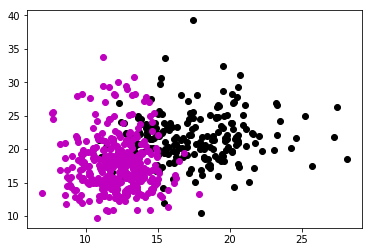

In [124]:
data = np.loadtxt('wdbc12.data.txt',delimiter = ',') 

## Exploration des data
print("Taille des données : (nombre d'exemples, nombre de features+2)", data.shape)
print("Nombre de malades ie de classe 1 : ", np.sum(data[:,1]==1)) 
print("Nombre de bénins ie de classe 2 : ", np.sum(data[:,1]==2)) 
print("Proportion de malades ie de classe 1 : ", np.sum(data[:,1]==1)/data.shape[0]) 
# Remarque : la première colonne, ID du client, ne sert à rien ici

## Visualisation des données brutes (2 premiers features)
plt.figure()
plt.plot(data[data[:,1]==1,2],data[data[:,1]==1,3],'ko')  # class 1 in black
plt.plot(data[data[:,1]==2,2],data[data[:,1]==2,3],'mo')  # class 2 in magenta
plt.show()


Vérification que la moyenne de chaque feature est environ = 0 : 
 [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
Vérification que l'écart-type de chaque feature = 1 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


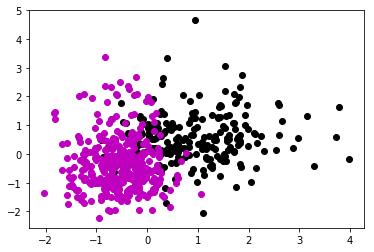

In [125]:
### Data normalization

def normalize_data(raw_data):
    """
        Function which normalize the data
        parameters:
        - raw_data : matrix of data (N,M), the first two columns correspond to ID and classes, the next columns correspond 
        to the features (of course, we only normalize the features). N rows correspond to N examples
        
        returns:
        - normalize_data : raw_data normalized
        - mean_vector : vector of M-2 elements, mean of the features
        - std_vector : vector of M-2 elements, standard deviation of the features
        
    """
    data_shape = raw_data.shape
    mean_vector  = np.mean (raw_data[:,2:],axis=0) # mean_vector[i] : moyenne de la colonne du feature i
    std_vector  = np.std (raw_data [:,2:],axis=0)  # std_vector[i] : écart-type de la colonne du feature i
    
    normalized_data = raw_data
    normalized_data[:,2:] = (raw_data[:,2:]-mean_vector)/std_vector
    return(normalized_data,mean_vector,std_vector)

norm_data,_,_ = normalize_data(data)

## Vérification
print("Vérification que la moyenne de chaque feature est environ = 0 : \n", np.mean(norm_data[:,2:],axis=0))
print("Vérification que l'écart-type de chaque feature = 1 : \n",np.std(norm_data[:,2:],axis=0))

## Visualisation des données normalisées (2 premiers features)
plt.figure()
plt.plot(norm_data[norm_data[:,1]==1,2],norm_data[norm_data[:,1]==1,3],'ko')  # class 1 in black
plt.plot(norm_data[norm_data[:,1]==2,2],norm_data[norm_data[:,1]==2,3],'mo')  # class 2 in magenta
plt.show()


In [126]:
### Séparation test et training set
def split_data (data,nb_train):
    """
        Function which splits the data into a test_set and a training set
        parameters :
        - data : matrix of data to split
        - nb_train : number of training examples we want to keep
        
        returns :
        - train_set : matrix of training data
        - test_set : matrix of test data
        - N_test : number of elements of the test set
    """
    np.random.shuffle(data) # mélange des exemples 
    train_set = data[:nb_train,:]
    test_set = data[nb_train:,:]
    N_test = test_set.shape[0]
    return(train_set,test_set,N_test)



In [127]:
def knn_algo_deux (K,train_set,test_set):
    """
        Function which operates knn algorithm.
        parameters:
        - K : number of k nearest neighbours wanted
        - train_set : (N_train,M+2) training data, N_train examples, M features, 1st column is ID, 2nd column is class
        - test_set : (N_test,M+2) test data
        
        returns : 
        - error_rate : Percentage of error
        - predic_class : vector of N_test elements, which give the predicted class of the test points.
    """
    
    
    ## Matrices, valeurs utiles
    N_train = train_set.shape[0]
    N_test = test_set.shape[0]
    train_features = train_set [:,2:] # matrice de features du training set (N_train x nb_features)
    test_features = test_set [:,2:] # matrice de features du test set (N_test x nb_features)
    class_train = train_set[:,1] # vecteur qui donne les classes(1 ou 2) du training set
    class_test = test_set[:,1] # vecteur qui donne les classes (1 ou 2) du test set
    
    
    ## Calcul matrice distances_square :
    train_features_transpose = np.transpose(train_features)
    test_features_transpose = np.transpose(test_features)
    tile_train_features  = np.tile(train_features_transpose[:,:,np.newaxis],(1,1,N_test))
    tile_test_features = np.tile(test_features_transpose[:,np.newaxis,:],(1,N_train,1))

    
    matrice_square = np.square(tile_test_features-tile_train_features) 
    # matrice_square[i,j,k] donne (x_ij-y_ik)², où x_ij est le feature i du jiè exemple du training set, y_ik du test set

    distances_square = np.sum(matrice_square,axis=0)
    # distances_square[i,j] donne la distance au carrée entre le iè exemple du training set et le jè point du test set
    

    
    ## Calcul matrice knearest : donne les indices des k plus proches voisins 
    ind_sort = np.argsort(distances_square,axis=0) 
    # ind_sort : tableau d'indices du training set ordonnés (ordre croissant des distances)
    knearest = ind_sort[:K,:]    
    
    
    ## Compute predic_class : vecteur qui contient la classe prédite pour chaque point i du test set
    knearest_class = np.zeros(knearest.shape) 
    # init knearest_class : array avec les classes correspondant aux indices de knearest (ses éléments sont 1 ou 2)
    
    count_class_1 = np.zeros(N_test)
    # init count_class_1 : vecteur qui compte le nombre de classes 1 parmi les knearest de i

    predic_class = np.zeros(N_test)
    
    
    for i in range(N_test):
        knearest_class[:,i] = class_train[knearest[:,i]]
        count_class_1 [i] = np.sum (knearest_class[:,i]==1)
        if (count_class_1[i] >= np.ceil(K/2) ):
            predic_class[i] = 1
        else:
            predic_class[i] = 2 
        # Si K est pair, et qu'il y a autant de classe 1 que de classe 2, l'algo prédit 1 (malade) : il vaut mieux avoir 
        # des faux positifs que des faux négatifs !

    accuracy = np.sum(class_test == predic_class)/N_test 
    error_rate = (1 - accuracy)*100  # en pourcentage
    return error_rate, predic_class


Nombre d'examples du training set :  100
Nombre d'examples du test set :  469
Error rate for K =  15 is 8.528784648187637 %
Error rate for K =  30 is 8.742004264392323 %
Error rate for K =  45 is 12.153518123667373 %
Error rate for K =  60 is 17.910447761194025 %
Error rate for K =  75 is 37.31343283582089 %
Error rate for K =  90 is 37.31343283582089 %
Nombre d'examples du training set :  300
Nombre d'examples du test set :  269
Error rate for K =  10 is 1.8587360594795488 %
Error rate for K =  20 is 4.460966542750933 %
Error rate for K =  30 is 4.832713754646845 %
Error rate for K =  40 is 4.460966542750933 %
Error rate for K =  50 is 5.2044609665427455 %
Error rate for K =  60 is 5.576208178438657 %
Error rate for K =  70 is 5.947955390334569 %
Error rate for K =  80 is 5.947955390334569 %
Error rate for K =  90 is 7.434944237918217 %
Error rate for K =  100 is 7.80669144981413 %
Nombre d'examples du training set :  500
Nombre d'examples du test set :  69
Error rate for K =  10 is 0

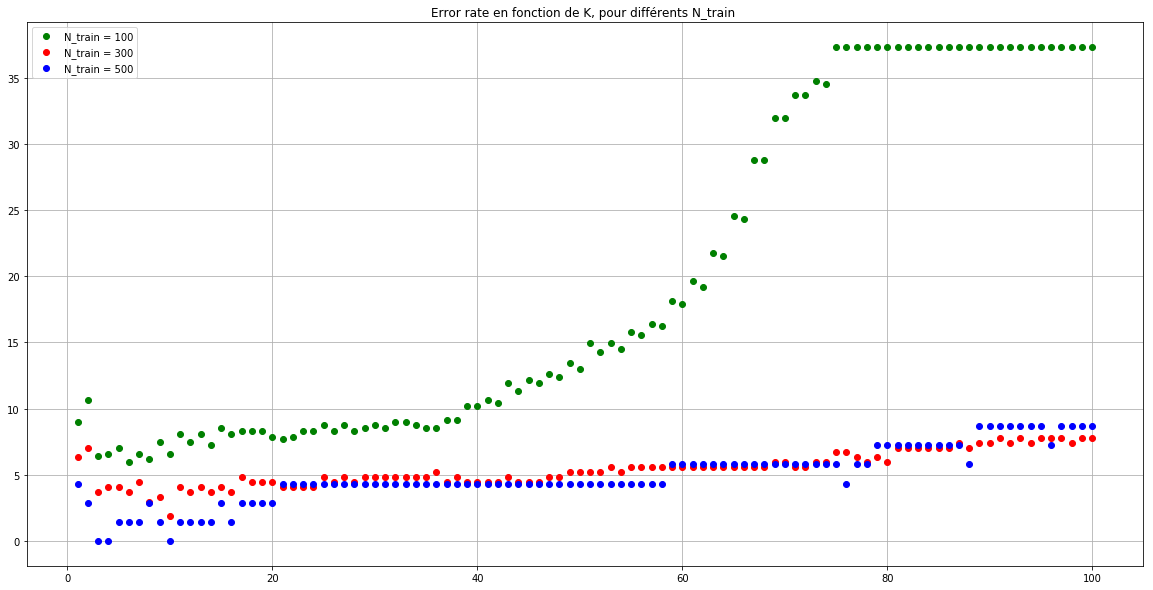

In [128]:
### Test with various training set

####
plt.figure(figsize= (20,10))
N_train = 100 # number of examples of the data we want to keep for the training set
train_set,test_set,N_test = split_data(norm_data,N_train)
print("Nombre d'examples du training set : ",N_train)
print("Nombre d'examples du test set : ", N_test)

nb_test = 100 # number of values of K we want to test 
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = knn_algo_deux(K,train_set,test_set)
    if K%15 == 0:
        print("Error rate for K = ",K, "is",error_rate[K-1], "%" )

plt.plot(np.arange(1,nb_test+1),error_rate,'go', label = "N_train = " + str(N_train))
###


####
N_train = 300 # number of examples of the data we want to keep for the training set
train_set,test_set,N_test = split_data(norm_data,N_train)
print("Nombre d'examples du training set : ",N_train)
print("Nombre d'examples du test set : ", N_test)

nb_test = 100 # number of values of K we want to test 
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = knn_algo_deux(K,train_set,test_set)
    if K%10 == 0:
        print("Error rate for K = ",K, "is",error_rate[K-1], "%" )

plt.plot(np.arange(1,nb_test+1),error_rate,'ro', label = "N_train = " + str(N_train))
###


####  
N_train = 500 # number of examples of the data we want to keep for the training set
train_set,test_set,N_test = split_data(norm_data,N_train)
print("Nombre d'examples du training set : ",N_train)
print("Nombre d'examples du test set : ", N_test)

nb_test = 100 # number of values of K we want to test 
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = knn_algo_deux(K,train_set,test_set)
    if K%10 == 0:
        print("Error rate for K = ",K, "is",error_rate[K-1], "%" )

plt.plot(np.arange(1,nb_test+1),error_rate,'bo', label = "N_train = " + str(N_train)) 
plt.legend()
plt.title("Error rate en fonction de K, pour différents N_train ")
plt.grid()
###

Si on a un K très grand pour un N_train petit, cela revient à toujours prédire à peu près la même chose. En effet, dans le cas limite où K = N_train, on prédira toujours la classe qui était majoritaire dans le training set. D'où le "plateau" pour la courbe verte à K >= 75 (N_train = 100). 
En effet, pour expliquer cela, dans nos données, nous avons environ 37% de malades. Pour N_train =100 :  il y a de grandes chances que le training_set contienne majoritairement des bénins (classe 2). Ainsi, à partir de K = 75, l'algorithme ne prédit que des bénins (classes 2). Dans notre test_set, on peut supposer qu'il y a environ 37% aussi de malades. (les données étant mélangées avant d'être séparées par la fonction split) Comme l'algorithme prédit toujours classe 2 (bénin), il va se tromper environ 37% des fois. D'où le plateau à environ 37% lorsque K >= 75.

Nous remarquons que l'on a de meilleurs résultats avec un training set plus grand. Cela est intuitif, car cela sera plus précis avec beaucoup de données.


### 3. Making K-NN faster using `cython`

Cython is a package that permits to interface C code with Python easily. It may be useful to make your code faster for a small coding effort, in particular when using long loops.

See <http://docs.cython.org/en/latest/src/tutorial/cython_tutorial.html> for more details.

_Indication : an example is given in the notebook_ **`cython_example.ipy`**.

** TO DO (subsidiary):** Here you may use it to implement a faster version of K-NN.

In [129]:
import cython_knn
import matplotlib.pyplot as plt
import numpy as np
import time

In [130]:
data = np.loadtxt('wdbc12.data.txt',delimiter = ',') 
norm_data,_,_ = cython_knn.normalize_data(data)

Nombre d'examples du training set :  100
Nombre d'examples du test set :  469
Error rate for K =  15 is 4.690831556503195 %
Error rate for K =  30 is 7.249466950959493 %
Error rate for K =  45 is 12.579957356076754 %
Error rate for K =  60 is 23.2409381663113 %
Error rate for K =  75 is 37.953091684434966 %
Error rate for K =  90 is 37.953091684434966 %
Nombre d'examples du training set :  300
Nombre d'examples du test set :  269
Error rate for K =  10 is 4.460966542750933 %
Error rate for K =  20 is 4.832713754646845 %
Error rate for K =  30 is 4.832713754646845 %
Error rate for K =  40 is 5.2044609665427455 %
Error rate for K =  50 is 6.691449814126393 %
Error rate for K =  60 is 7.063197026022305 %
Error rate for K =  70 is 7.063197026022305 %
Error rate for K =  80 is 7.80669144981413 %
Error rate for K =  90 is 8.178438661710041 %
Error rate for K =  100 is 8.921933085501854 %
Nombre d'examples du training set :  500
Nombre d'examples du test set :  69
Error rate for K =  10 is 4.

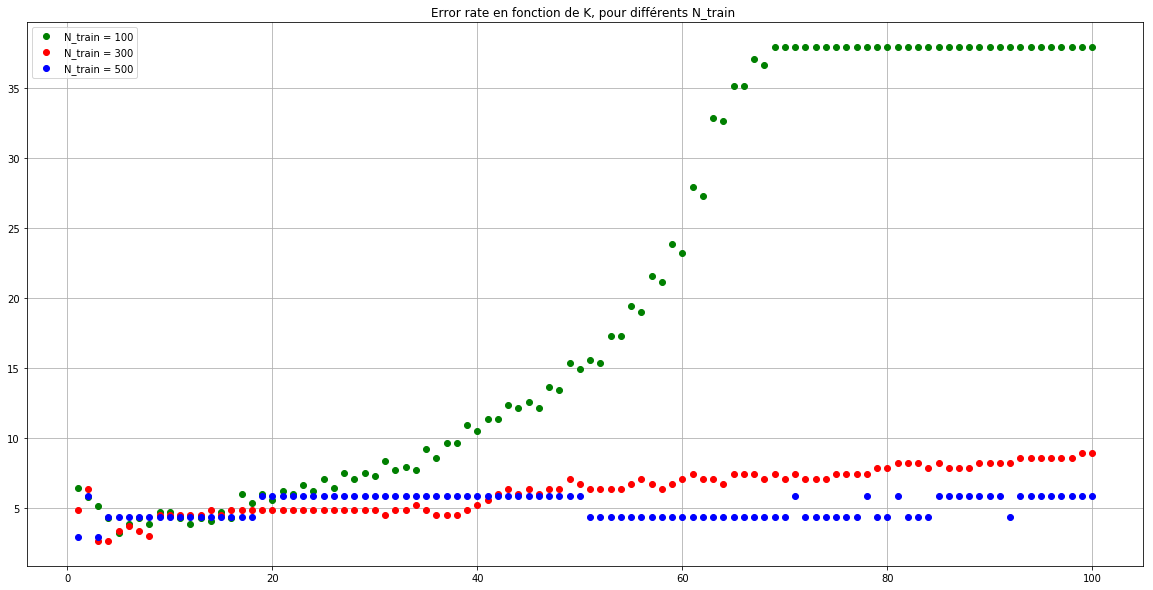

In [131]:
### Test with various training set

####
plt.figure(figsize= (20,10))
N_train = 100 # number of examples of the data we want to keep for the training set
train_set,test_set,N_test = cython_knn.split_data(norm_data,N_train)
print("Nombre d'examples du training set : ",N_train)
print("Nombre d'examples du test set : ", N_test)

nb_test = 100 # number of values of K we want to test 
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = cython_knn.knn_algo_deux(K,train_set,test_set)
    if K%15 == 0:
        print("Error rate for K = ",K, "is",error_rate[K-1], "%" )

plt.plot(np.arange(1,nb_test+1),error_rate,'go', label = "N_train = " + str(N_train))
###


####
N_train = 300 # number of examples of the data we want to keep for the training set
train_set,test_set,N_test = cython_knn.split_data(norm_data,N_train)
print("Nombre d'examples du training set : ",N_train)
print("Nombre d'examples du test set : ", N_test)

nb_test = 100 # number of values of K we want to test 
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = cython_knn.knn_algo_deux(K,train_set,test_set)
    if K%10 == 0:
        print("Error rate for K = ",K, "is",error_rate[K-1], "%" )

plt.plot(np.arange(1,nb_test+1),error_rate,'ro', label = "N_train = " + str(N_train))
###


####  
N_train = 500 # number of examples of the data we want to keep for the training set
train_set,test_set,N_test = cython_knn.split_data(norm_data,N_train)
print("Nombre d'examples du training set : ",N_train)
print("Nombre d'examples du test set : ", N_test)

nb_test = 100 # number of values of K we want to test 
error_rate = np.zeros(nb_test)
for K in range (1,nb_test + 1):
    error_rate[K-1],_ = cython_knn.knn_algo_deux(K,train_set,test_set)
    if K%10 == 0:
        print("Error rate for K = ",K, "is",error_rate[K-1], "%" )

plt.plot(np.arange(1,nb_test+1),error_rate,'bo', label = "N_train = " + str(N_train)) 
plt.legend()
plt.title("Error rate en fonction de K, pour différents N_train ")
plt.grid()
###
